# Import the necessary libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=7,6
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [72]:
#Load the dataset

df=pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [73]:
df.shape

(301, 9)

In [74]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
115,Royal Enfield Classic 350,2015,1.11,1.47,17500,Petrol,Individual,Manual,0


In [75]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [76]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [78]:
df.describe().style.background_gradient()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


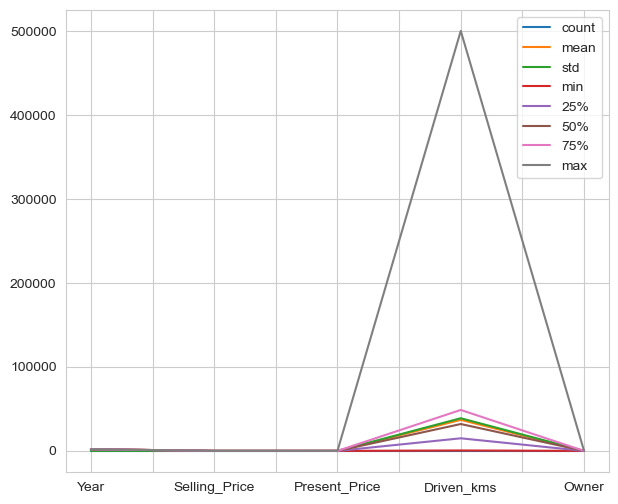

In [79]:
df.describe().T.plot()
plt.show()

In [80]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [81]:
df['Car_Name']=df['Car_Name'].str.split(" ")
df['Car_Name']=df['Car_Name'].str.slice(0,3).str.join("")
df['Car_Name']

0        ritz
1         sx4
2        ciaz
3      wagonr
4       swift
        ...  
296      city
297      brio
298      city
299      city
300      brio
Name: Car_Name, Length: 301, dtype: object

In [82]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [83]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [84]:
df=df.replace(['Petrol', 'Diesel', 'CNG'],[1,2,3])
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,2,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,1,Dealer,Manual,0
3,wagonr,2011,2.85,4.15,5200,1,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,2,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,2,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,1,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,1,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,2,Dealer,Manual,0


In [85]:
df['Selling_type'].value_counts()

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [86]:
df=df.replace(['Dealer', 'Individual'],[1,2])
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,Manual,0
1,sx4,2013,4.75,9.54,43000,2,1,Manual,0
2,ciaz,2017,7.25,9.85,6900,1,1,Manual,0
3,wagonr,2011,2.85,4.15,5200,1,1,Manual,0
4,swift,2014,4.60,6.87,42450,2,1,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,2,1,Manual,0
297,brio,2015,4.00,5.90,60000,1,1,Manual,0
298,city,2009,3.35,11.00,87934,1,1,Manual,0
299,city,2017,11.50,12.50,9000,2,1,Manual,0


In [87]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [88]:
df=df.replace(['Manual', 'Automatic'],[0,1])
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,0,0
1,sx4,2013,4.75,9.54,43000,2,1,0,0
2,ciaz,2017,7.25,9.85,6900,1,1,0,0
3,wagonr,2011,2.85,4.15,5200,1,1,0,0
4,swift,2014,4.60,6.87,42450,2,1,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,2,1,0,0
297,brio,2015,4.00,5.90,60000,1,1,0,0
298,city,2009,3.35,11.00,87934,1,1,0,0
299,city,2017,11.50,12.50,9000,2,1,0,0


In [89]:
dummies1=pd.get_dummies(df['Car_Name'])
dummies1=dummies1.astype(int)
dummies1

,800,Activa3g,Activa4g,BajajAvenger150,BajajAvenger220,BajajAvengerStreet,BajajDiscover100,BajajDiscover125,BajajDominar400,BajajPulsar,...,landcruiser,omni,ritz,scross,swift,sx4,verna,vitarabrezza,wagonr,xcent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df=df.drop(['Car_Name'],axis='columns')

In [91]:
df=pd.concat([df,dummies1],axis='columns')
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,800,Activa3g,...,landcruiser,omni,ritz,scross,swift,sx4,verna,vitarabrezza,wagonr,xcent
0,2014,3.35,5.59,27000,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2013,4.75,9.54,43000,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2017,7.25,9.85,6900,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,2.85,4.15,5200,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2014,4.60,6.87,42450,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,2015,4.00,5.90,60000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,2009,3.35,11.00,87934,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,2017,11.50,12.50,9000,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df=df.drop(df.columns[51],axis='columns')
df=df.reset_index(drop=True)
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,800,Activa3g,...,landcruiser,omni,ritz,scross,swift,sx4,verna,vitarabrezza,wagonr,xcent
0,2014,3.35,5.59,27000,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2013,4.75,9.54,43000,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2017,7.25,9.85,6900,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,2.85,4.15,5200,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2014,4.60,6.87,42450,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,2015,4.00,5.90,60000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,2009,3.35,11.00,87934,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,2017,11.50,12.50,9000,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df=df.drop(['Owner'],axis='columns')
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,800,Activa3g,Activa4g,...,landcruiser,omni,ritz,scross,swift,sx4,verna,vitarabrezza,wagonr,xcent
0,2014,3.35,5.59,27000,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2013,4.75,9.54,43000,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2017,7.25,9.85,6900,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,2.85,4.15,5200,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2014,4.60,6.87,42450,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,2015,4.00,5.90,60000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,2009,3.35,11.00,87934,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,2017,11.50,12.50,9000,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

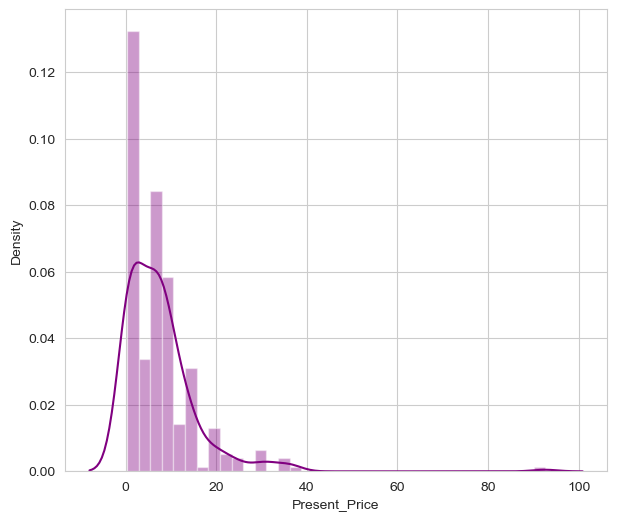

In [94]:
sns.set_style("whitegrid")
sns.distplot(df['Present_Price'],color='#800080')
plt.show()

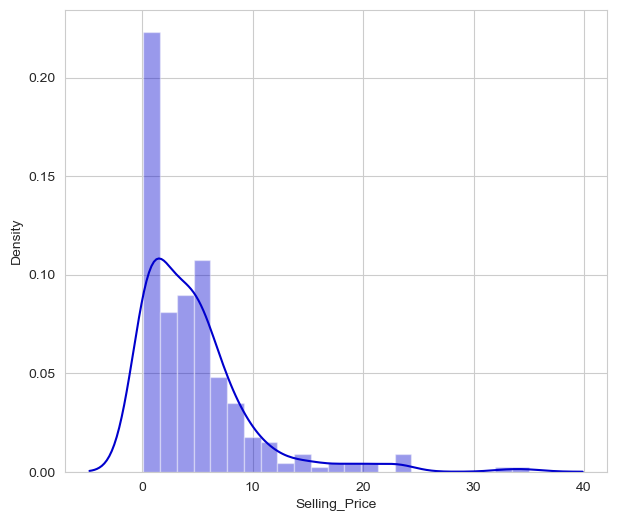

In [95]:
sns.set_style("whitegrid")
sns.distplot(df['Selling_Price'],color='#0000CD')
plt.show()

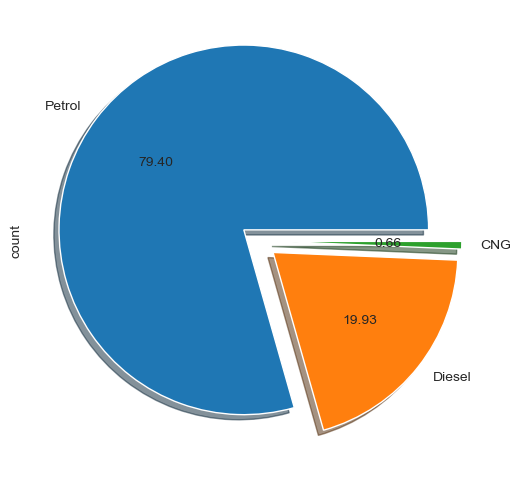

In [96]:
labels=['Petrol', 'Diesel', 'CNG']
df['Fuel_Type'].value_counts().plot(kind='pie',autopct='%.2f',explode=(0.1,0.1,0.1),labels=labels,shadow=True)
plt.show()

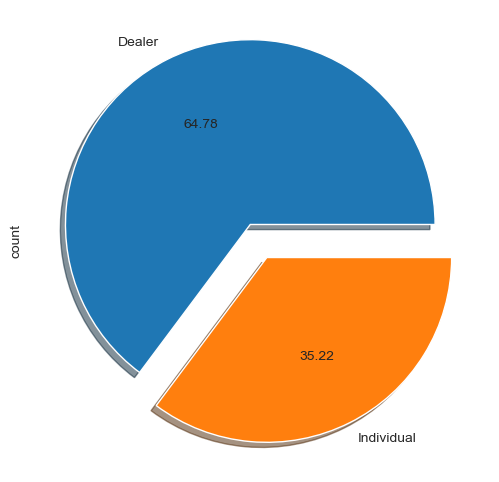

In [97]:
labels=['Dealer', 'Individual']
df['Selling_type'].value_counts().plot(kind='pie',autopct='%.2f',explode=(0.1,0.1),labels=labels,shadow=True)
plt.show()

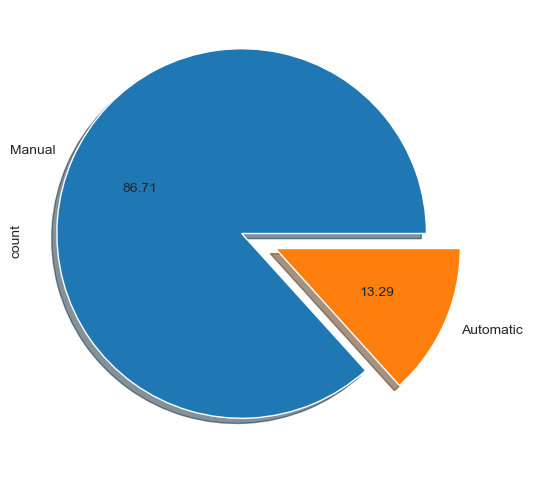

In [98]:
labels=['Manual', 'Automatic']
df['Transmission'].value_counts().plot(kind='pie',autopct='%.2f',explode=(0.1,0.1),labels=labels,shadow=True)
plt.show()

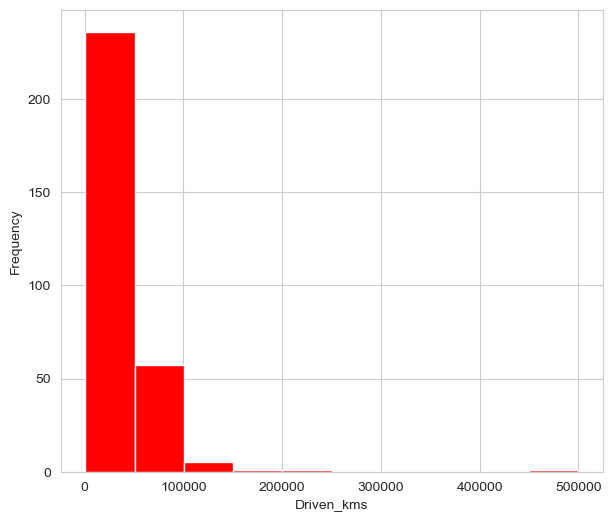

In [99]:
df['Driven_kms'].plot(kind='hist',color='red')
plt.xlabel('Driven_kms')
plt.show()

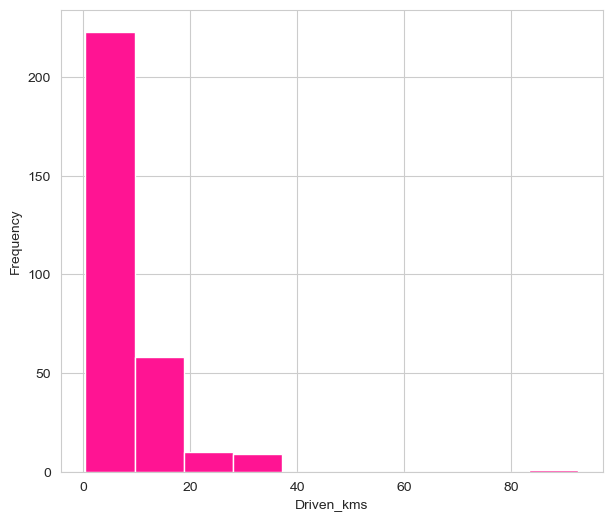

In [100]:
df['Present_Price'].plot(kind='hist',color='#FF1493')
plt.xlabel('Driven_kms')
plt.show()

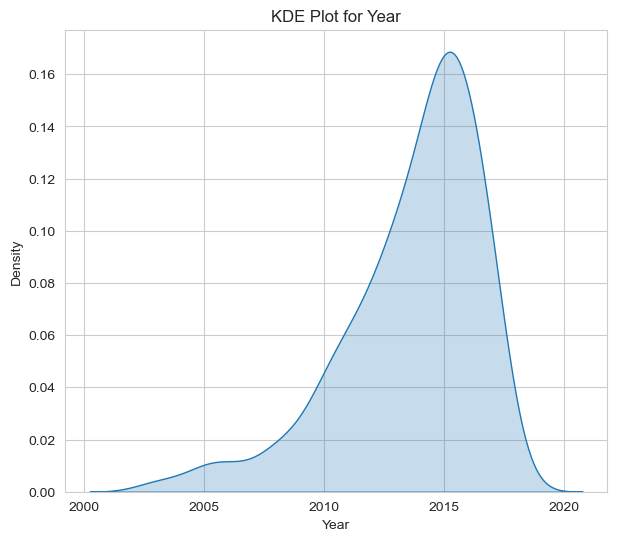

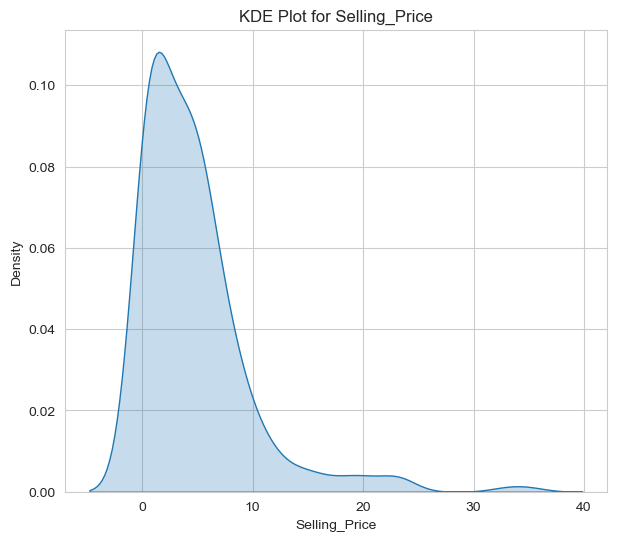

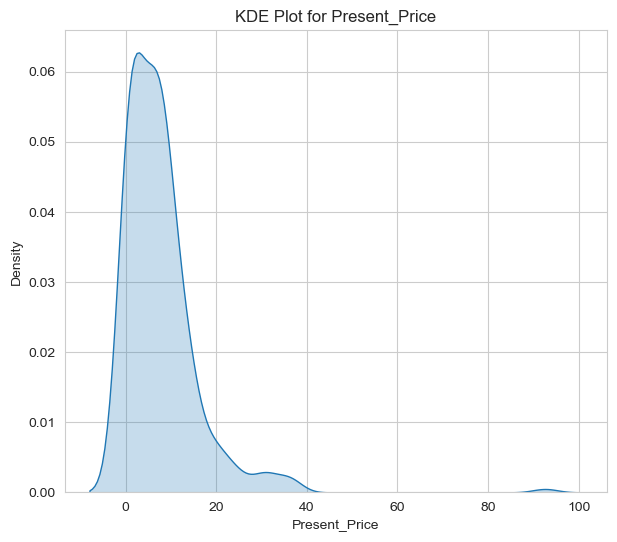

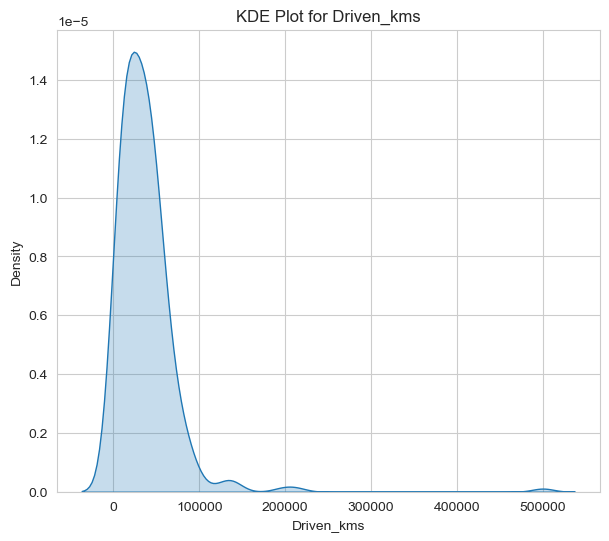

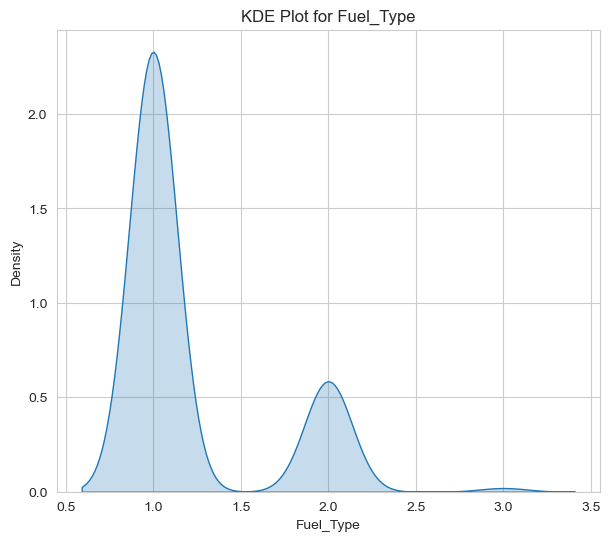

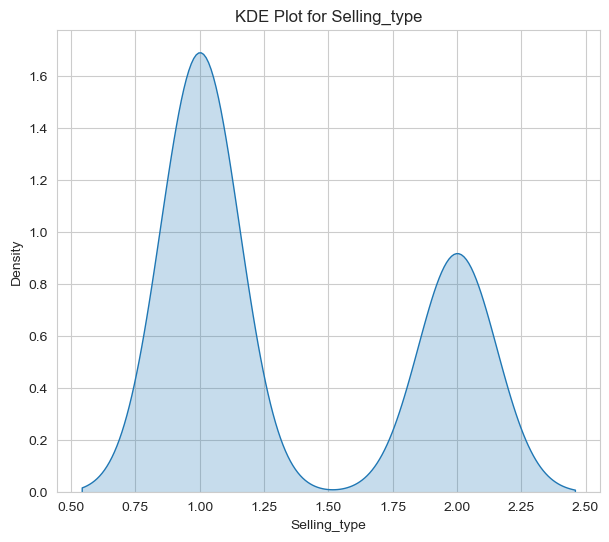

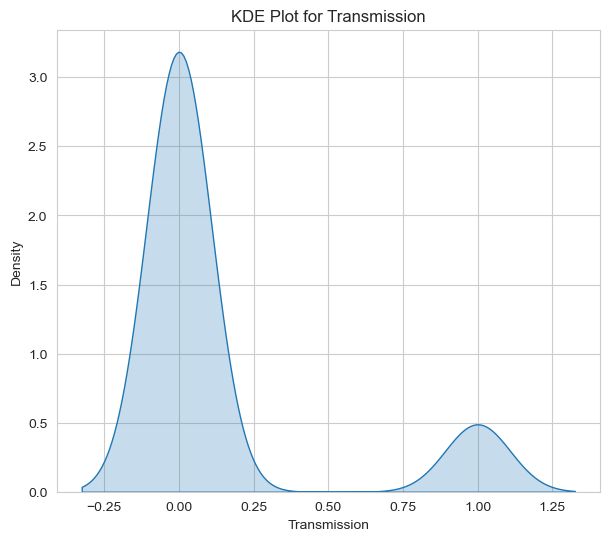

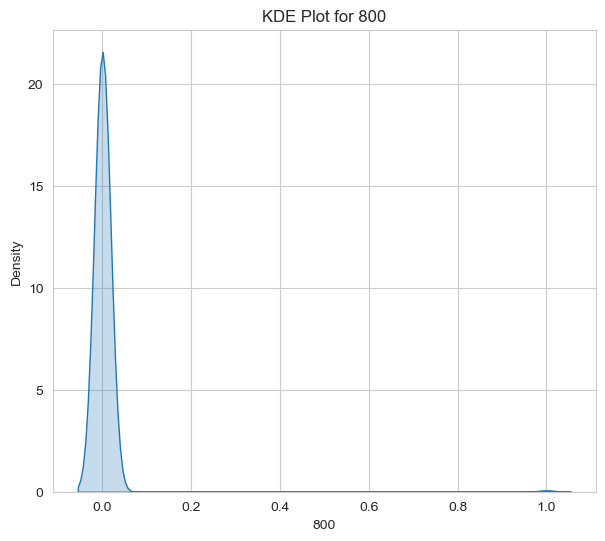

In [101]:
for col in df.columns[:8]:
    plt.figure()
    sns.kdeplot(df[col], shade=True)
    plt.title(f'KDE Plot for {col}')
    plt.show()
    plt.show()

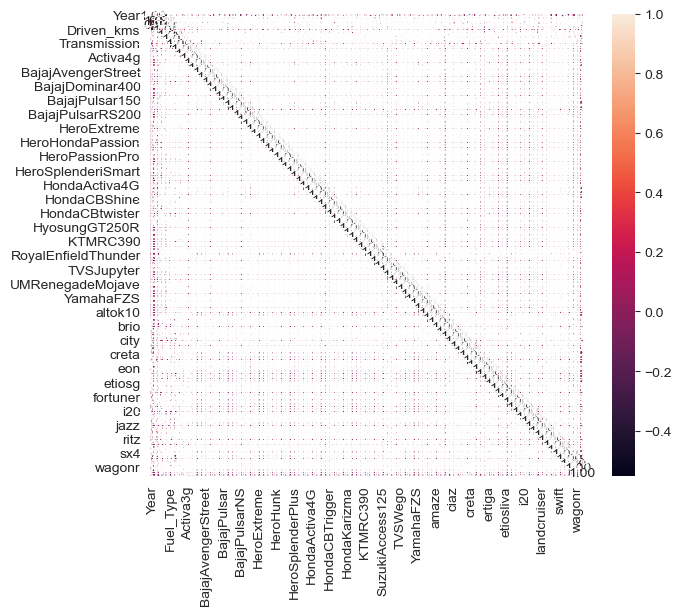

In [102]:
correlation=df.corr()
sns.heatmap(correlation,annot=True,fmt='0.2f')
plt.show()

# Training the Dataset using train_test_split

In [103]:
x=df.drop(['Selling_Price'],axis='columns')
y=df['Selling_Price']

In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.8,random_state=1)
X_train.shape,Y_train.shape

((60, 97), (60,))

In [105]:
#LinearRegression

lr=LinearRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
print("The first five predicted values are:")
print(y_pred[0:5])
print("The first five test values are:")
print(Y_test[0:5])

The first five predicted values are:
[ 7.66511136  3.60076468 -1.12590406  2.90292128  1.05447395]
The first five test values are:
285    7.40
248    4.00
150    0.50
217    3.15
107    1.25
Name: Selling_Price, dtype: float64


In [106]:
r2_score(Y_test,y_pred)

0.7364781721916669

In [107]:
print(cross_val_score(lr,x,y,cv=10))

[ 5.27034798e-01  8.79924554e-01  7.30639131e-01  8.69647001e-01
 -2.08951115e+02 -6.49588619e+03 -2.86184562e+00  9.16313442e-01
  9.10786330e-01  8.92233108e-01]


In [108]:
print(np.average(cross_val_score(lr,x,y,cv=10)))

-670.1972570950378


In [109]:
#Lasso Regression

lasso=Lasso()
lasso.fit(X_train,Y_train)
y_pred=lasso.predict(X_test)
print("The first five predicted values are:")
print(y_pred[0:5])
print("The first five test values are:")
print(Y_test[0:5])

The first five predicted values are:
[5.68598913 3.02758664 0.73574569 3.88195532 1.65386137]
The first five test values are:
285    7.40
248    4.00
150    0.50
217    3.15
107    1.25
Name: Selling_Price, dtype: float64


In [110]:
r2_score(Y_test,y_pred)

0.8143026778373326

In [111]:
print(cross_val_score(lasso,x,y,cv=10))

[ 8.19193515e-01  8.76105869e-01  6.48379086e-01  8.00777686e-01
 -7.77950747e+01 -6.10346304e+02  1.16109151e-01  7.23412818e-01
  7.47362257e-01  7.80648190e-01]


In [112]:
print(np.average(cross_val_score(lasso,x,y,cv=10)))

-68.26293902144079


In [113]:
#DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
y_pred=dtr.predict(X_test)
print("The first five predicted values are:")
print(y_pred[0:5])
print("The first five test values are:")
print(Y_test[0:5])

The first five predicted values are:
[6.4  2.95 0.78 2.9  1.05]
The first five test values are:
285    7.40
248    4.00
150    0.50
217    3.15
107    1.25
Name: Selling_Price, dtype: float64


In [114]:
r2_score(Y_test,y_pred)

0.7875481692790465

In [115]:
print(cross_val_score(dtr,x,y,cv=10))

[ 0.83198424  0.96640795  0.76748168  0.96963679 -1.44469145 -9.83873757
  0.9511808   0.66250673  0.84098033  0.68431205]


In [116]:
print(np.average(cross_val_score(dtr,x,y,cv=10)))

-0.5703907408792318


In [117]:
model = Ridge(alpha=1.0)  # alpha is the regularization strength
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print("The first five predicted values are:")
print(y_pred[0:5])
print("The first five test values are:")
print(Y_test[0:5])

The first five predicted values are:
[ 7.43310454  3.47212452 -0.90458844  3.6394571   0.83152959]
The first five test values are:
285    7.40
248    4.00
150    0.50
217    3.15
107    1.25
Name: Selling_Price, dtype: float64


In [118]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]})

In [119]:
r2_score(Y_test,y_pred)

0.8788204202218929

In [120]:
print(cross_val_score(model,x,y,cv=10))

[ 7.34093989e-01  9.07677815e-01  7.10994906e-01  8.76214768e-01
 -1.15771985e+02 -1.38827145e+03 -1.17195688e+00  8.59118599e-01
  9.13453831e-01  9.10967205e-01]


In [121]:
print(np.average(cross_val_score(model,x,y,cv=10)))

-149.9302869784059


In [122]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio controls balance between Lasso and Ridge
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print("The first five predicted values are:")
print(y_pred[0:5])
print("The first five test values are:")
print(Y_test[0:5])

The first five predicted values are:
[5.77489262 2.96023418 0.52196889 3.95809582 1.55979339]
The first five test values are:
285    7.40
248    4.00
150    0.50
217    3.15
107    1.25
Name: Selling_Price, dtype: float64


In [123]:
r2_score(Y_test,y_pred)

0.8216601970941707

In [124]:
print(cross_val_score(model,x,y,cv=10))

[ 8.31958595e-01  8.78641558e-01  6.56124152e-01  8.05862873e-01
 -8.33527415e+01 -6.31257611e+02  2.27841674e-01  7.39943108e-01
  7.64706903e-01  8.05257934e-01]


In [125]:
print(np.average(cross_val_score(model,x,y,cv=10)))

-70.89000159464723


In [126]:
model = RandomForestRegressor(n_estimators=100, max_depth=10)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print("The first five predicted values are:")
print(y_pred[0:5])
print("The first five test values are:")
print(Y_test[0:5])

The first five predicted values are:
[7.143225   3.01466667 0.67490857 3.14816667 1.0421619 ]
The first five test values are:
285    7.40
248    4.00
150    0.50
217    3.15
107    1.25
Name: Selling_Price, dtype: float64


In [127]:
r2_score(Y_test,y_pred)

0.8239706447025743

In [128]:
print(cross_val_score(model,x,y,cv=10))

[ 0.90807202  0.96909218  0.70957128  0.97246295 -1.01765102 -3.27987325
  0.9666885   0.91561904  0.88455048  0.88254773]


In [129]:
print(cross_val_score(model,x,y,cv=10))

[ 0.90814764  0.97300639  0.72679584  0.98048365 -1.07530843 -3.48933045
  0.96471303  0.89805499  0.88940063  0.88374313]


In [130]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print("The first five predicted values are:")
print(y_pred[0:5])
print("The first five test values are:")
print(Y_test[0:5])

The first five predicted values are:
[6.64868351 3.16324007 0.66788934 3.04507184 1.14452031]
The first five test values are:
285    7.40
248    4.00
150    0.50
217    3.15
107    1.25
Name: Selling_Price, dtype: float64


In [131]:
r2_score(Y_test,y_pred)

0.8079050383703332

In [132]:
print(cross_val_score(model,x,y,cv=10))

[  0.89786268   0.98310959   0.72460635   0.96210822   0.18503907
 -26.25950821   0.96549132   0.93038267   0.88545983   0.85962195]


In [133]:
print(cross_val_score(model,x,y,cv=10))

[  0.89996939   0.9829279    0.72630199   0.9694623    0.18503907
 -25.86985991   0.96496667   0.93018355   0.8858636    0.85965775]


In [134]:
model_accuracies = {}

# List of models to evaluate
models = [
    ('LinearRegression',LinearRegression()),
    ('Lasso Regression', Lasso()),
    ('RandomForestRegressor',  RandomForestRegressor()),
     ('GradientBoostingRegressor',GradientBoostingRegressor()),
    ('ElasticNet',ElasticNet()),
    ('DecisionTreeRegressor',DecisionTreeRegressor())
]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = r2_score(Y_test, y_pred)
    model_accuracies[name] = accuracy

# Create a DataFrame for better visualization
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

In [135]:
# Sort the accuracy DataFrame in descending order of Accuracy
accuracy_df_sorted = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Display the sorted DataFrame
accuracy_df_sorted.style.background_gradient()

,Model,Accuracy
2,RandomForestRegressor,0.852430
4,ElasticNet,0.821660
1,Lasso Regression,0.814303
3,GradientBoostingRegressor,0.805195
5,DecisionTreeRegressor,0.753203
0,LinearRegression,0.736478


In [137]:
import pickle
model =RandomForestRegressor()
model.fit(X_train, Y_train)

# Save the model as a pickle file
with open('car data.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the saved model
with open('car data.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Function for prediction with user input
def predict_price(Selling_Price):
    input_data = [['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Transmission', '800', 'Act', 'Baj', 'Her', 'Hon',
       'Hyo', 'KTM', 'Mah', 'Roy', 'Suz', 'TVS', 'UMR', 'Yam', 'alt', 'ama',
       'bal', 'bri', 'cam', 'cia', 'cit', 'cor', 'cre', 'dzi', 'ela', 'eon',
       'ert', 'eti', 'for', 'gra', 'i10', 'i20', 'ign', 'inn', 'jaz', 'lan',
       'omn', 'rit', 'scr', 'swi', 'sx4', 'ver', 'vit', 'wag']]
    predicted = loaded_model.predict(input_data)[0]
    return predicted